<a href="https://colab.research.google.com/github/ElTaqui/1erParcial_IA/blob/main/Versiones/1erParcial_Taquichiri_Luis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1er Parcial COM300 IA
Taquichiri Huarita Luis Alexander

####Importación de bibliotecas

In [137]:
#Para interactuar con el sistema operativo.
import os
#Para la manipulación y análisis de datos tabulares (DataFrames).
import pandas as pd
#Para realizar operaciones matemáticas y manipulación de arreglos/matrices.
import numpy as np
#Para la creación de gráficos y visualización de datos.
from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline

Cargar y revisar el data set

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning/datasets/Player_Attributes.csv', delimiter=',', decimal='.')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177037 non-null  int64  
 1   player_fifa_api_id   177037 non-null  int64  
 2   player_api_id        177037 non-null  int64  
 3   date                 177037 non-null  object 
 4   overall_rating       177037 non-null  float64
 5   potential            177037 non-null  float64
 6   preferred_foot       177037 non-null  object 
 7   attacking_work_rate  177037 non-null  object 
 8   defensive_work_rate  177037 non-null  object 
 9   crossing             177037 non-null  float64
 10  finishing            177037 non-null  float64
 11  heading_accuracy     177037 non-null  float64
 12  short_passing        177037 non-null  float64
 13  volleys              177037 non-null  float64
 14  dribbling            177037 non-null  float64
 15  curve                1

####Arreglo del Data set

Cargar datos

In [140]:
#Cargar los datos en un data set limpio y más fácil de manejar
nuevo_data = data.iloc[:20000, [4,5,9,10,11,12,13,14,15,16,17]]
#convertir los datos para tener clases dividiendo los jugadores en: muy malos, malos, neutro, buenos y muy buenos (0,1,2,3,4)
first = np.zeros(nuevo_data.shape[0])
for i in range(nuevo_data.shape[0]):
  if nuevo_data.iloc[i,0] <= 20:
    first[i] = 0
  elif nuevo_data.iloc[i,0] <= 40:
    first[i] = 1
  elif nuevo_data.iloc[i,0] <= 60:
    first[i] = 2
  elif nuevo_data.iloc[i,0] <= 80:
    first[i] = 3
  else:
    first[i] = 4
#print(nuevo_data.iloc[100:200,0])
nuevo_data.iloc[:,0] = first
#print(nuevo_data.iloc[100:200,0])

In [141]:
print(nuevo_data)

       overall_rating  potential  crossing  finishing  heading_accuracy  \
0                 3.0       71.0      49.0       44.0              71.0   
1                 3.0       71.0      49.0       44.0              71.0   
2                 3.0       66.0      49.0       44.0              71.0   
3                 3.0       65.0      48.0       43.0              70.0   
4                 3.0       65.0      48.0       43.0              70.0   
...               ...        ...       ...        ...               ...   
20686             3.0       70.0      63.0       55.0              56.0   
20687             3.0       69.0      63.0       44.0              56.0   
20688             3.0       67.0      63.0       44.0              56.0   
20689             3.0       73.0      62.0       72.0              58.0   
20690             3.0       73.0      62.0       72.0              58.0   

       short_passing  volleys  dribbling  curve  free_kick_accuracy  \
0               61.0     44.

Insertar atributos de: carácter, texto y valores booleanos

In [142]:
def agregarCTB(data):
  # Agregar atributos de texto (posición del jugador)
  positions = ['Defensor', 'MedioCampista', 'Delantero', 'Portería']
  data['posicion'] = np.random.choice(positions, data.shape[0])
  # Agregar atributos de caracteres (Categoría: A, B, C, D)
  levels = ['A', 'B', 'C', 'D']
  data['Categoría'] = np.random.choice(levels, data.shape[0])
  # Agregar atributos booleanos (¿Es titular?)
  data['Es titular?'] = np.random.choice([True, False], data.shape[0])

In [143]:
agregarCTB(nuevo_data)
print(nuevo_data)

       overall_rating  potential  crossing  finishing  heading_accuracy  \
0                 3.0       71.0      49.0       44.0              71.0   
1                 3.0       71.0      49.0       44.0              71.0   
2                 3.0       66.0      49.0       44.0              71.0   
3                 3.0       65.0      48.0       43.0              70.0   
4                 3.0       65.0      48.0       43.0              70.0   
...               ...        ...       ...        ...               ...   
20686             3.0       70.0      63.0       55.0              56.0   
20687             3.0       69.0      63.0       44.0              56.0   
20688             3.0       67.0      63.0       44.0              56.0   
20689             3.0       73.0      62.0       72.0              58.0   
20690             3.0       73.0      62.0       72.0              58.0   

       short_passing  volleys  dribbling  curve  free_kick_accuracy  \
0               61.0     44.

Duplicado de los datos del data set

In [144]:
#como los datos son de jugadores de futbol y no hay forma de hacer una corelación exacta usaré
#un numero random para aumentar o restar del valor original haciendo una variación que no afecte mucho
#manteniendo las clases y ramdomificando los datos de otro tipo con la función
data_duplicado = pd.DataFrame()
data_duplicado['overall_rating'] = nuevo_data.iloc[:,0]
for j in range(1,11):
  temp = []
  for i in range(nuevo_data.shape[0]):
    temp.append(nuevo_data.iloc[i, j] + np.random.uniform(-3, 3))
  data_duplicado[nuevo_data.columns[j]] = temp

In [145]:
agregarCTB(data_duplicado)
print(data_duplicado)

       overall_rating  potential   crossing  finishing  heading_accuracy  \
0                 3.0  71.915722  50.066798  46.121180         69.971617   
1                 3.0  71.448782  47.499669  45.428845         71.458084   
2                 3.0  66.584631  50.828319  41.702832         72.892118   
3                 3.0  65.151199  49.083337  43.100601         67.640981   
4                 3.0  63.674829  46.932098  44.849897         68.277024   
...               ...        ...        ...        ...               ...   
20686             3.0  72.877691  62.324003  55.404174         58.509130   
20687             3.0  69.064068  65.199647  43.127167         53.192841   
20688             3.0  69.221387  65.420582  46.360100         54.406351   
20689             3.0  70.684261  62.816504  71.448072         60.730646   
20690             3.0  74.372694  63.701282  71.088438         58.857701   

       short_passing    volleys  dribbling      curve  free_kick_accuracy  \
0         

Función para visualizar datos en un eje

In [146]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Centros')
    pyplot.xlabel('Potencial')

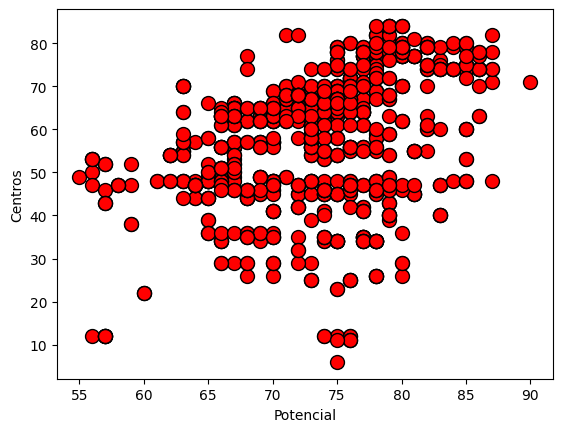

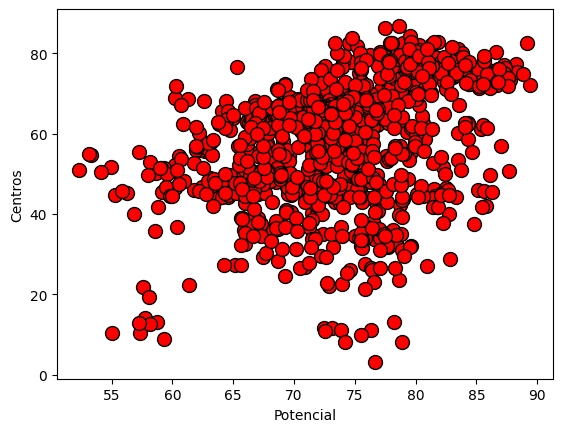

In [147]:
plotData(nuevo_data.iloc[:1000,1], nuevo_data.iloc[:1000,2])
plotData(data_duplicado.iloc[:1000,1], data_duplicado.iloc[:1000,2])

Juntar los dataset inicial y sintetico en un solo data set

In [148]:
def intercalar_filas(df1, df2):
    # Concatenar los DataFrames fila por fila alternadamente
    df_combined = pd.DataFrame()
    for i in range(df1.shape[0]):
        df_combined = pd.concat([df_combined, df1.iloc[[i]], df2.iloc[[i]]], ignore_index=True)
    return df_combined

In [149]:
data_final = intercalar_filas(nuevo_data, data_duplicado)
print(data_final)

       overall_rating  potential   crossing  finishing  heading_accuracy  \
0                 3.0  71.000000  49.000000  44.000000         71.000000   
1                 3.0  71.915722  50.066798  46.121180         69.971617   
2                 3.0  71.000000  49.000000  44.000000         71.000000   
3                 3.0  71.448782  47.499669  45.428845         71.458084   
4                 3.0  66.000000  49.000000  44.000000         71.000000   
...               ...        ...        ...        ...               ...   
39995             3.0  69.221387  65.420582  46.360100         54.406351   
39996             3.0  73.000000  62.000000  72.000000         58.000000   
39997             3.0  70.684261  62.816504  71.448072         60.730646   
39998             3.0  73.000000  62.000000  72.000000         58.000000   
39999             3.0  74.372694  63.701282  71.088438         58.857701   

       short_passing    volleys  dribbling      curve  free_kick_accuracy  \
0         